In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal
import numpy as np

In [10]:
help(signal.butter)

Help on function butter in module scipy.signal.filter_design:

butter(N, Wn, btype='low', analog=False, output='ba')
    Butterworth digital and analog filter design.
    
    Design an Nth order digital or analog Butterworth filter and return
    the filter coefficients.
    
    Parameters
    ----------
    N : int
        The order of the filter.
    Wn : array_like
        A scalar or length-2 sequence giving the critical frequencies.
        For a Butterworth filter, this is the point at which the gain
        drops to 1/sqrt(2) that of the passband (the "-3 dB point").
        For digital filters, `Wn` is normalized from 0 to 1, where 1 is the
        Nyquist frequency, pi radians/sample.  (`Wn` is thus in
        half-cycles / sample.)
        For analog filters, `Wn` is an angular frequency (e.g. rad/s).
    btype : {'lowpass', 'highpass', 'bandpass', 'bandstop'}, optional
        The type of filter.  Default is 'lowpass'.
    analog : bool, optional
        When True, return 

In [5]:
def butter_lowpass(x,fcut,f_sample,order,plen): 
    """
    Butterworth Filter by Vivek Yadav
    https://carnd-udacity.atlassian.net/wiki/questions/22680807/filtering-steering-angle-butterworth-filter-for-smoothing-filtfilt-
    x: unfiltered data
    fcut : cutoff frequency 0.5 1.0
    f_sample : sampling frequency = length of the sample (count instances)
    order : Order of filter (usually 4)
    plen: padding length (typically left as 0)
    """

    rat = fcut/f_sample

    b, a = signal.butter(order, rat)
    y = signal.filtfilt(b, a, x, padlen=plen)
    return y

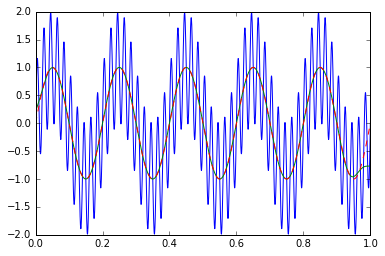

In [7]:
f_sample = 2000
t = np.linspace(0, 1.0, f_sample+1)
xlow = np.sin(2 * np.pi * 5 * t)
xhigh = np.sin(2 * np.pi * 50 * t)
x = xlow + xhigh
fcut = 30

y = butter_lowpass(x,fcut,f_sample,4,0)

plt.plot(t,x,t,y,t,xlow,'r--');